In [58]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [59]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[]

In [60]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids) #list of BuiltinTimeSeries for uuid
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

In [61]:
type(iphone_ts[0])

emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries

In [62]:
len(iphone_ts) 

4

In [63]:
iphone_ts[0]

In [64]:
iphone_battery_df = map(lambda t:t.get_data_df("background/battery"), iphone_ts) #list of dataframes for key=background/battery
android_battery_df = map(lambda t:t.get_data_df("background/battery"), android_ts)

In [65]:
len(iphone_battery_df)

4

In [66]:
first_ios_df = iphone_battery_df[0] #battery data for ios_1

In [67]:
type(first_ios_df)

pandas.core.frame.DataFrame

In [143]:
first_ios_df.info() #65 entries = 65 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
_id                  65 non-null object
battery_level_pct    65 non-null float64
battery_status       65 non-null int64
fmt_time             65 non-null object
local_dt             65 non-null datetime64[ns]
metadata_write_ts    65 non-null float64
ts                   65 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 3.6+ KB


In [68]:
first_ios_df

,_id,battery_level_pct,battery_status,fmt_time,local_dt,metadata_write_ts,ts
0,56ff6e031268798022721b87,23.0,1,2016-04-02T00:00:18.144429-07:00,2016-04-02 00:00:18.144,1.459580e+09,1.459580e+09
1,56ff7c151268798022721c85,23.0,1,2016-04-02T00:01:25.579024-07:00,2016-04-02 00:01:25.579,1.459580e+09,1.459580e+09
2,56ff7c151268798022721c87,18.0,1,2016-04-02T01:00:17.290792-07:00,2016-04-02 01:00:17.290,1.459584e+09,1.459584e+09
3,56ff8a1c1268798022721ce9,18.0,1,2016-04-02T01:01:29.230781-07:00,2016-04-02 01:01:29.230,1.459584e+09,1.459584e+09
4,56ff8a1c1268798022721ceb,14.0,1,2016-04-02T02:00:10.180783-07:00,2016-04-02 02:00:10.180,1.459588e+09,1.459588e+09
5,56ff982e1268798022721d73,14.0,1,2016-04-02T02:01:18.432297-07:00,2016-04-02 02:01:18.432,1.459588e+09,1.459588e+09
6,56ff982f1268798022721d78,10.0,1,2016-04-02T03:00:10.854305-07:00,2016-04-02 03:00:10.854,1.459591e+09,1.459591e+09
7,56ffa63d126879802272496d,10.0,1,2016-04-02T03:01:21.952996-07:00,2016-04-02 03:01:21.952,1.459591e+09,1.459591e+09
8,56ffa63d126879802272496f,6.0,1,2016-04-02T04:00:11.461077-07:00,2016-04-02 04:00:11.461,1.459595e+09,1.459595e+09
9,56ffb44f12687980227249bb,6.0,1,2016-04-02T04:01:30.768046-07:00,2016-04-02 04:01:30.768,1.459595e+09,1.459595e+09


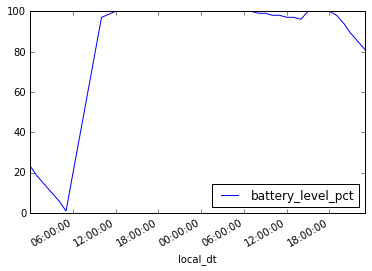

In [69]:
first_ios_df.plot(x='local_dt', y='battery_level_pct')

In [70]:
type(ifig)

matplotlib.figure.Figure

In [71]:
type(iaxes2d) #2d array

numpy.ndarray

In [72]:
iaxes = iaxes2d.flatten()
type(iaxes) #1d array

numpy.ndarray

In [73]:
type(iaxes[0])

matplotlib.axes._subplots.AxesSubplot

About to plot 0
About to plot 1
About to plot 2
About to plot 3


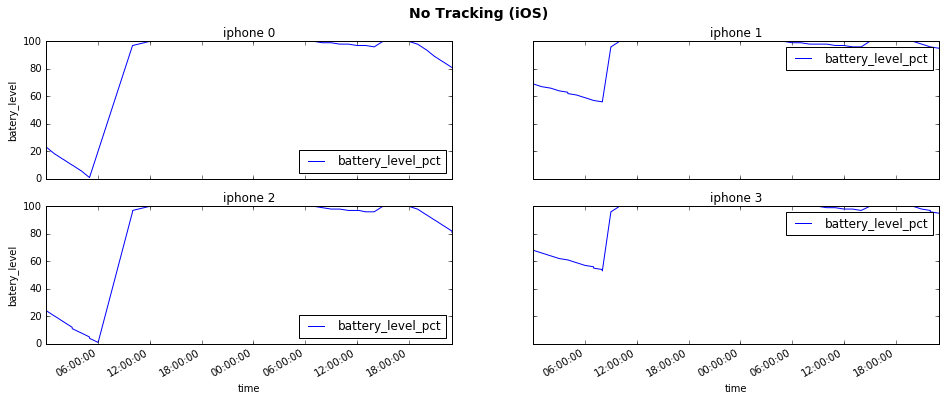

In [74]:
(ifig, iaxes2d) = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(16,6))
iaxes = iaxes2d.flatten()
ifig.suptitle('No Tracking (iOS)', fontsize=14, fontweight='bold')
for i, df in enumerate(iphone_battery_df):
    print "About to plot %d" % i
    fixed_df = df[df.battery_level_pct > 0]
    fixed_df.plot(x='local_dt', y='battery_level_pct', ax=iaxes[i], title='iphone %d' %i)
    #iaxes[i].set_title('iphone %d' %i) #gives title for each subplot
    iaxes[i].set_xlabel('time')
    iaxes[i].set_ylabel('batery_level')

About to plot 0
About to plot 1
About to plot 2
About to plot 3


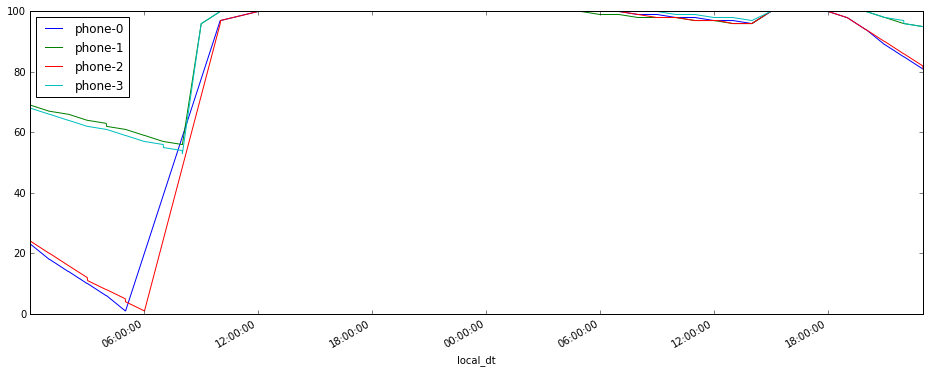

In [75]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
for i, df in enumerate(iphone_battery_df):
    print "About to plot %d" % i
    df.plot(x='local_dt', y='battery_level_pct', ax=iaxes, label="phone-%s" % i)

In [76]:
first_android_df = android_battery_df[0]

In [77]:
first_android_df[0:2]

,_id,android_health,android_plugged,android_technology,android_temperature,android_voltage,battery_level_pct,battery_status,fmt_time,local_dt,metadata_write_ts,ts
0,56fff7c312687980227264d9,GOOD,UNKNOWN,Li-ion,236,236,21,1,2016-04-02T03:13:19.880000-07:00,2016-04-02 03:13:19.880,1.459592e+09,1.459592e+09
1,570021d6126879802272bac3,GOOD,AC,Li-ion,206,206,100,3,2016-04-02T09:48:30.731000-07:00,2016-04-02 09:48:30.731,1.459616e+09,1.459616e+09


About to plot 0
About to plot 1
About to plot 2
About to plot 3


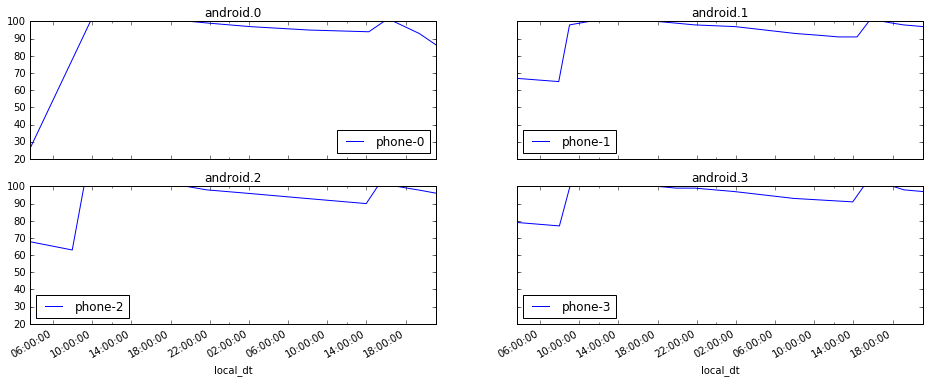

In [78]:
(afig, aaxes2d) = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()
for i, df in enumerate(android_battery_df):
    print "About to plot %d" % i
    df.plot(x='local_dt', y='battery_level_pct', ax=aaxes[i], title="android.%s" % i, label="phone-%s" % i)

About to plot 0
About to plot 1
About to plot 2
About to plot 3


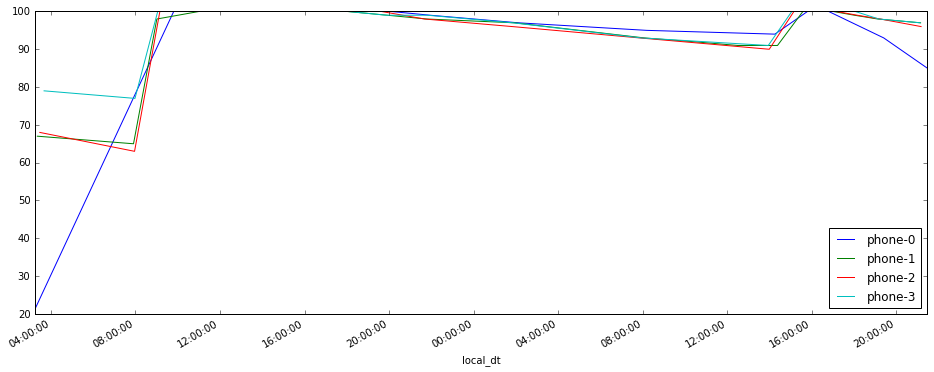

In [79]:
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
aaxes = aaxes2d
for i, df in enumerate(android_battery_df):
    print "About to plot %d" % i
    df.plot(x='local_dt', y='battery_level_pct', ax=aaxes, label="phone-%s" % i)

In [80]:
ranges_df = pd.read_csv("../results_spring_2016/ranges.csv", error_bad_lines=False)

Skipping line 53: expected 7 fields, saw 8



In [81]:
type(ranges_df)

pandas.core.frame.DataFrame

In [82]:
ranges_df

,start_ts,start_fmt_time,end_ts,end_fmt_time,state,android_regime,ios_regime
0,1.459279e+09,2016-03-29T12:17:14.700000-07:00,1.459288e+09,2016-03-29T14:46:54.916000-07:00,moving,high+1sec,best+1m
1,1.459288e+09,2016-03-29T14:46:54.916000-07:00,1.459301e+09,2016-03-29T18:30:30.685000-07:00,loitering,high+1sec,best+1m
2,1.459301e+09,2016-03-29T18:30:54.916000-07:00,1.459302e+09,2016-03-29T18:42:30.685000-07:00,moving,high+1sec,best+1m
3,1.459302e+09,2016-03-29T18:42:30.685000-07:00,1.459311e+09,2016-03-29T21:06:30.275000-07:00,moving,high+1sec,best+1m
4,1.459311e+09,2016-03-29T21:06:30.275000-07:00,1.459343e+09,2016-03-30T06:00:09.654643-07:00,stationary,high+1sec,best+1m
5,1.459343e+09,2016-03-30T06:00:09.654643-07:00,1.459354e+09,2016-03-30T09:00:13.859000-07:00,charging-or-full,high+1sec,best+1m
6,1.459354e+09,2016-03-30T09:00:13.859000-07:00,1.459372e+09,2016-03-30T14:01:58.965395-07:00,charging-or-full,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
7,1.459372e+09,2016-03-30T14:01:58.965395-07:00,1.459372e+09,2016-03-30T14:13:55.019000-07:00,loitering,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
8,1.459372e+09,2016-03-30T14:13:55.019000-07:00,1.459373e+09,2016-03-30T14:24:42.464000-07:00,moving,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
9,1.459373e+09,2016-03-30T14:24:42.464000-07:00,1.459376e+09,2016-03-30T15:21:27.670000-07:00,loitering,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m


In [83]:
regime_grouped_ranges_df = ranges_df.groupby(['state', 'android_regime', 'ios_regime'])

In [102]:
regime_grouped_ranges_df

In [104]:
for k, df in regime_grouped_ranges_df:
    print 'key=' + str(k)
    print df

key=('charging', 'tracking-off', 'tracking-off')
        start_ts                    start_fmt_time        end_ts  \
32  1.459609e+09  2016-04-02T07:57:37.753000-07:00  1.459644e+09   
34  1.459721e+09  2016-04-03T15:00:35.358757-07:00  1.459729e+09   
36  1.459789e+09  2016-04-04T10:02:13.321972-07:00  1.459800e+09   
38  1.459833e+09        2016-04-04T22:05:02.444129  1.459866e+09   
44  1.459923e+09  2016-04-05T23:10:31.349801-07:00  1.460037e+09   
46  1.460099e+09  2016-04-08T00:00:10.875548-07:00  1.460125e+09   

                        end_fmt_time     state android_regime    ios_regime  
32  2016-04-02T17:47:43.791000-07:00  charging   tracking-off  tracking-off  
34  2016-04-03T17:18:29.931541-07:00  charging   tracking-off  tracking-off  
36  2016-04-04T12:59:12.753874-07:00  charging   tracking-off  tracking-off  
38  2016-04-05T07:20:38.395970-07:00  charging   tracking-off  tracking-off  
44        2016-04-07T06:51:10.875548  charging   tracking-off  tracking-off  
46  20

In [227]:
def get_combined_df(sensor_df, ranges_df):
    #sensor_df = dataframe of iphone_battery_df[0]
    #ranges_df = dataframe of every thing from ranges.cvs with key=stationary & tracking-off (with the "key" removed)
    print(type(sensor_df))
    combined_df_parts = map(lambda row: sensor_df[(sensor_df.metadata_write_ts >= row[1].start_ts) & (sensor_df.metadata_write_ts <= row[1].end_ts)],
                                                  ranges_df.iterrows())
    # combined_df = pd.concat(combined_df_parts)
    # print combined_df[["ts", "fmt_time", "battery_level_pct", "battery_status"]]
    r = filter(lambda df: len(df) > 1, combined_df_parts)
    return r

In [228]:
def get_combined_df_list(sensor_df_list, ranges_df):
    sensor_ranges_df_list = []
    for df in sensor_df_list:
        sensor_ranges_df_list.append(get_combined_df(df, ranges_df))
    return sensor_ranges_df_list

In [229]:
import matplotlib.dates as mpld

def plot_combined_drain(sensor_df_list, title):
    print "len(sensor_df_list) = %s" % len(sensor_df_list)
    sensor_df_lengths = map(lambda l: len(l), sensor_df_list)
    (fig, axes) = plt.subplots(ncols=max(sensor_df_lengths), nrows=1, sharey=True, figsize=(16,6))
    fig.suptitle(title)
    if max(sensor_df_lengths) == 1:
        axes = [axes]
    for i, phone_df_list in enumerate(sensor_df_list):
        print "About to plot %d plots for phone %d" % (len(phone_df_list), i)
        for j, curr_phone_df in enumerate(phone_df_list):
            print "len(df) = %d" % len(curr_phone_df)
            axes[j].xaxis.set_major_formatter(mpld.DateFormatter('%h %d %H:%M'))
            curr_phone_df.plot(x='local_dt', y='battery_level_pct', ax=axes[j], ylim=(0,100), label="phone-%s" % i)

In [230]:
#i=0
#for key, df in regime_grouped_ranges_df:
    #print key, df.columns, i 
    #print(df)
    #print(type(df))
    #type(df)
    #if key[0] == 'moving':
    #    print "For key %s, ranges_df %s " % (key, df)
    #    combined_df_list = get_combined_df_list(iphone_battery_df, df)
    #    plot_combined_drain(combined_df_list, title=("ios", key[0], key[2]))
    #i = i+1

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
after dropping, lengths are [22, 25, 25, 23]
[[ 1.          0.9528599   0.96863625  0.88875033]
 [ 0.9528599   1.          0.98275191  0.80829063]
 [ 0.96863625  0.98275191  1.          0.81876536]
 [ 0.88875033  0.80829063  0.81876536  1.        ]]
<class 'pandas.core.series.Series'>


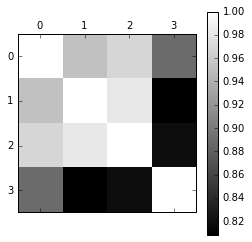

In [231]:
#-------Correlation Analysis-------#

import numpy as np

for key, df in regime_grouped_ranges_df:
    if key[0] == 'stationary' and key[1] == 'tracking-off':
        #df = every thing from ranges.cvs with 
        
        #print "For key %s, ranges_df %s " % (key, df)
        #print(type(df)) #pandas.core.frame.DataFrame
        #print(type(iphone_battery_df[0])) #pandas.core.frame.DataFrame
        #print(df)
        print('===============================================')
        #print(iphone_battery_df[0])
        combined_df_list = get_combined_df_list(iphone_battery_df, df)
        #print(type(combined_df_list[0][0])) #pandas.core.frame.DataFrame
        concat_df_list = map(lambda rl: pd.concat(rl).battery_level_pct, combined_df_list)
        #print(type(concat_df_list[0])) #pandas.core.series.Series
        filtered_concat_df_list = map(lambda cdf: cdf[pd.notnull(cdf)], concat_df_list)
        df_list = map(lambda df: df[0:21], filtered_concat_df_list)
        filtered_lengths = map(lambda rl: len(rl), filtered_concat_df_list)
        print "after dropping, lengths are %s" % filtered_lengths
        min_length = min(filtered_lengths)
        if min_length == 0:
            print "One of the phones has no data for this time period, no point in comparing"
        elif min_length != filtered_lengths[0]:
            print "Data does not line up, skipping"
        else:
            #print np.corrcoef(filtered_concat_df_list)
            print np.corrcoef(df_list)
            print (type(df_list[0])) #pandas.core.series.Series
            #plt.matshow(np.corrcoef(filtered_concat_df_list), cmap=plt.cm.gray)
            plt.matshow(np.corrcoef(df_list), cmap=plt.cm.gray)
            plt.colorbar()

In [258]:
df = pd.DataFrame({'int': [1, 2, 3],
                  'float': [1.1, 2.2, 3.3]})
type(df.int) #pandas.core.series.Series
type(df.index) #pandas.indexes.range.RangeIndex

df

,float,int
0,1.1,1
1,2.2,2
2,3.3,3


In [257]:
type(df['float']) #pandas.core.series.Series

pandas.core.series.Series

In [259]:
df.to_csv('out.csv')

In [260]:
df1 = pd.DataFrame({'int': [0, 0, 0],
                  'float': [0.0, 0.0, 0.0]})
df1.to_csv('out.csv')

In [247]:
df.int.max()

3

In [248]:
df[[True, False, True]]

,float,int
0,1.1,1
2,3.3,3


In [245]:
type(df[[1]].int)

pandas.core.series.Series

In [240]:
for index, item in df.int.iteritems():
    item = item *2
    
print df

   float  int
0    1.1    1
1    2.2    2
2    3.3    3


In [199]:
type(df.index)
len(df.index)

3

In [206]:
df.iloc[0].int

1.0


In [207]:
df.iloc[-1].int

3.0

In [190]:
tracking_stopped = df[df.int>2]
tracking_stopped

,float,int
2,3.3,3


In [191]:
#m = map(lambda row: sys.stdout.write(str(row[1]['int']) + "\n"), df.iterrows())
m = map(lambda row: sys.stdout.write(str(row[1].int) + "\n"), df.iterrows())
print '==='
n = map(lambda row: sys.stdout.write(str(row[0]) + "\n"), df.iterrows())

#row[0] = index (row #)
#row[1] = series (data stored in that row, whose indexes derived from row's column names)

#type(m)

1.0
2.0
3.0
===
0
1
2


In [175]:
for index, row in df.iterrows():
    print row['int']

1.0
2.0
3.0


In [156]:
row = next(df.iterrows())[1]
type(row)
row

int      1.0
float    1.5
Name: 0, dtype: float64

In [210]:
1 == (1 | 2)

False

In [215]:
for i in range(1,4):
    print i

1
2
3


AttributeError: 'DataFrame' object has no attribute 'int'

In [253]:
dt = pydt.datetime(2013,9,1,11, 10)
ts = int(dt.strftime("%s"))


In [254]:
pydt.datetime.fromtimestamp(ts)

datetime.datetime(2013, 9, 1, 11, 10)

In [255]:
def local_dt_range(t):
    #time range specification
    dt1 = pydt.datetime(2016, 6, 24, 22, 0) #datetime.datetime(2016, 6, 24, 22, 0)
    dt2 = pydt.datetime(2016, 6, 26, 23, 0)
    dic = {}
    if (type(t) == type(dic)):
        y = t.get('year')
        m = t.get('month')
        d = t.get('day')
        h = t.get('hour')
        mi = t.get('minute')
        dt = pydt.datetime(y, m, d, h, mi)
        if dt1<=dt and dt<=dt2:
            return True
        else:
            return False
        
    ts = pd.Timestamp(pydt.datetime(2012, 5, 1))
    if (type(t) == type(ts)):
        dt = t.to_datetime()
        if dt1<=dt and dt<=dt2:
            return True
        else:
            return False
    return False

In [256]:
iphone_config_df_list = map(lambda t: t[t.local_dt.apply(local_dt_range)], i_config_df_list)
android_config_df_list = map(lambda t: t[t.local_dt.apply(local_dt_range)], a_config_df_list)

NameError: name 'i_config_df_list' is not defined

In [275]:
import pandas as pd
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2], 'ha':[0, 0]}).set_index('key')
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5], 'ha':[0, 0]}).set_index('key')
print left
left.join(right, lsuffix='_l', rsuffix='_r')

     ha  lval
key          
foo   0     1
bar   0     2


,ha_l,lval,ha_r,rval
key,,,,
foo,0,1,0,4
bar,0,2,0,5


In [266]:
range(1, 4)

[1, 2, 3]

In [267]:
3 == True

False

In [268]:
1 == True

True

In [269]:
0 == True

False

In [272]:
if 7:
    print "this"

this
